# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data info

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head(10)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience
0,1,Male,19,15000,39,Healthcare,1
1,2,Male,21,35000,81,Engineer,3
2,3,Female,20,86000,6,Engineer,1
3,4,Female,23,59000,77,Lawyer,0
4,5,Female,31,38000,40,Entertainment,2
5,6,Female,22,58000,76,Artist,0
6,7,Female,35,31000,6,Healthcare,1
7,8,Female,23,84000,94,Healthcare,1
8,9,Male,64,97000,3,Engineer,0
9,10,Female,30,98000,72,Artist,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1533 entries, 0 to 1532
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              1533 non-null   int64 
 1   Gender                  1533 non-null   object
 2   Age                     1533 non-null   int64 
 3   Annual Income ($)       1533 non-null   int64 
 4   Spending Score (1-100)  1533 non-null   int64 
 5   Profession              1533 non-null   object
 6   Work Experience         1533 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 84.0+ KB


# Distribution of Age

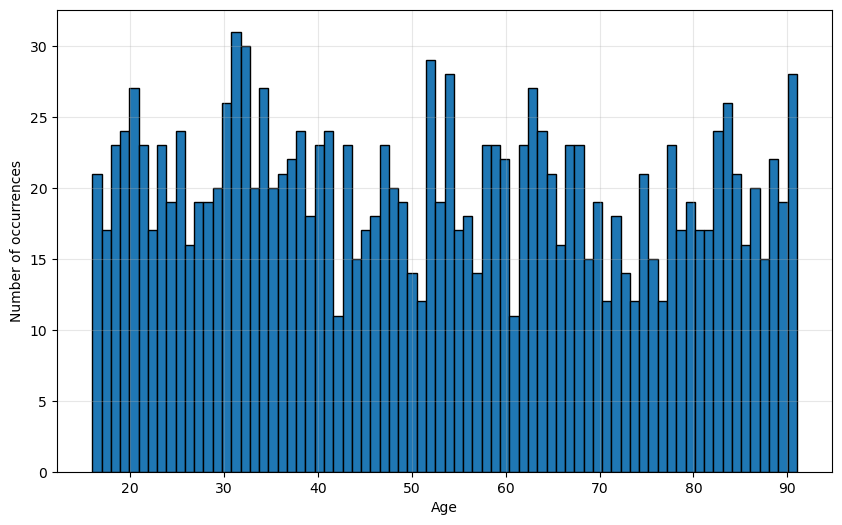

In [5]:
age_counts = pd.Series(df['Age']).value_counts().sort_index()
ages = age_counts.index
hist, bins = np.histogram(df['Age'], bins=len(ages))

plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=len(ages), edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of occurrences')
plt.grid(True, alpha=0.3)
plt.show()

# Laplace Mechanism

In [6]:
def laplace_mech(value, sensitivity, epsilon):
    noise = np.random.laplace(0, sensitivity / epsilon)
    return value + noise

epsilon = 1
dp_counts = [laplace_mech(c, 1, epsilon) for c in hist]

In [7]:
dp_counts_normalized = dp_counts / np.sum(dp_counts)

In [8]:
np.sum(dp_counts_normalized)

1.0

# Probability of Age (original data)

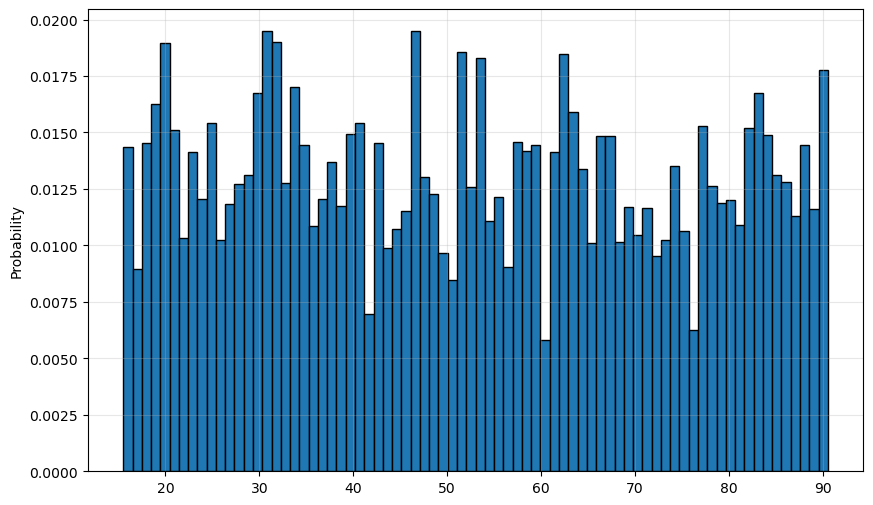

In [9]:
# Vẽ biểu đồ histogram dựa trên xác suất của tập dữ liệu gốc
plt.figure(figsize=(10, 6))
plt.bar(bins[:-1], dp_counts_normalized, width=np.diff(bins), edgecolor='black')
plt.ylabel('Probability')
plt.grid(True, alpha=0.3)
plt.show()

# Synthetic Data

In [10]:
synthetic_data= np.random.choice(bins[:-1], size=1560, replace=True, p=dp_counts_normalized)

# Probability of Age (Synthetic data)

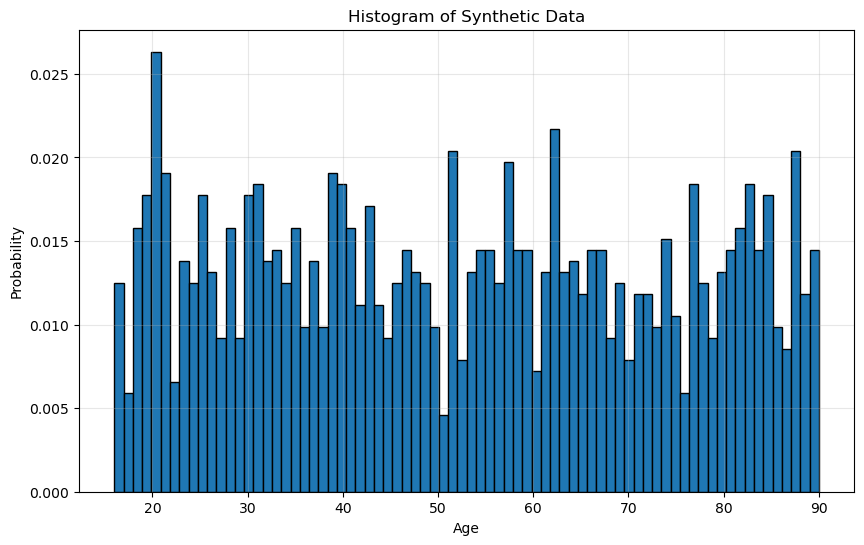

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(synthetic_data, bins=len(bins)-1, edgecolor='black', density=True)  # Sử dụng density=True để chuẩn hóa thành mật độ xác suất
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Histogram of Synthetic Data')
plt.grid(True, alpha=0.3)
plt.show()

# Age and Profession

In [18]:
ct = pd.crosstab(df['Age'],df['Profession'])
ct.head(10)

Profession,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
Age,,,,,,,,,
16,6,0,2,2,2,7,0,0,2
17,8,1,2,1,0,3,0,1,1
18,7,4,2,3,3,1,2,1,0
19,8,0,2,2,3,4,1,1,3
20,7,2,4,1,1,7,0,3,2
21,4,3,1,2,1,9,0,0,3
22,8,0,2,2,1,1,3,0,0
23,7,2,2,3,1,4,1,2,1
24,8,0,1,2,1,2,0,4,1
